In [3]:
pip install beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [1]:
from selenium import webdriver
from textblob import TextBlob
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import json

# Set up the Chrome WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open the URL for FitBit reviews on Drugs.com
url = 'https://community.fitbit.com/t5/Product-Feedback/idb-p/features/status-key/modreview'
driver.get(url)

# Pause to let the page load
time.sleep(5)

# Initialize list to store reviews
fitbit_reviews = []

# Loop through multiple pages (change range if you want more pages)
for page_num in range(1, 31):  # Iterate through 10 pages
    print(f"Scraping page {page_num}")
    
    # Find all review containers on the current page
    reviews = driver.find_elements(By.CSS_SELECTOR, "div.lia-message-view-wrapper")  # Ensure this is the correct selector
    # Extract and store the review text
    for review in reviews:
        try:
            # Update the selector based on your inspection
            comment = review.find_element(By.CSS_SELECTOR, ".lia-truncate-with-message-link").text.replace("... View more", "").strip()
            date = review.find_element(By.XPATH, '//*[@id="messageview2"]/div[2]/div/div[2]/div/div/div[2]/span[3]/span[4]/span[1]').text.strip()
            analysis = TextBlob(comment)
            if analysis.sentiment.polarity > 0:
                sentiment = 'Positive'
            elif analysis.sentiment.polarity < 0:
                sentiment = 'Negative'
            else:
                sentiment = 'Neutral'

            # print(sentiment)
            # Append the data to the list
            if comment:
                fitbit_reviews.append({
                    'Date': date,
                    'Comment': comment,
                    'Sentiment': sentiment
                })
                print({
                    'Date': date,
                    'Comment': comment,
                    'Sentiment': sentiment
                })

            # if comment:
                # fitbit_reviews.append(comment)
        except Exception as e:
            print(f"Error extracting comment: {e}")
            continue
    
    # Check if there are any reviews scraped for this page
    print(f"Reviews on page {page_num}: {len(fitbit_reviews)}")
    
    # Click the "Next" button to go to the next page if it exists
    try:
        next_button = driver.find_element(By.LINK_TEXT, "Next")
        next_button.click()
        time.sleep(5)  # Pause to let the next page load
    except Exception as e:
        print(f"No more pages after page {page_num}: {e}")
        break
        
print(fitbit_reviews)

# Close the browser
driver.quit()

# Save the reviews to a JSON file
with open('fitbit_reviews_selenium.json', 'w', encoding='utf-8') as json_file:
    json.dump(fitbit_reviews, json_file, ensure_ascii=False, indent=4)  # indent for pretty printing


Scraping page 1
{'Date': '03-28-2024', 'Comment': 'When I had my Charge 5 and the first few weeks of having my Charge 6 the app would give me a sleep summary page with, Sleep Stages, Time in each stage, Oxygen levels and Bedtime and wakeup all on a handy page. Since a recent update I now seem to get a much more basic three tiles and I have to open each one and look through for all the information.', 'Sentiment': 'Positive'}
{'Date': '03-28-2024', 'Comment': 'As an older user, my eyesight and hand eye coordination are poor. So, I prefer the website dashboard on my PC. That dashboard keeps directing us to the mobile app. Please assure you will continue maintaining both as I cannot rely solely on the mobile app. Please consider all of your customers when providing tools. Many thanks!', 'Sentiment': 'Positive'}
{'Date': '03-28-2024', 'Comment': 'Given that the community has been asking for this for 10 years, and now you will no longer have access to "create a meal" via the web version of t

TypeError: unsupported operand type(s) for +: 'dict' and 'str'

In [4]:
with open('fitbit_reviews_selenium.txt', 'w') as f:
    for review in fitbit_reviews[:500]:  # Limit to 500 reviews
        # Extract the review text using the correct key
        review_text = review.get('review_text', '')  # Default to empty string if key is missing
        f.write(review_text + '\n')

print(f"Total reviews extracted: {len(fitbit_reviews)}")


Total reviews extracted: 900


In [13]:
positive_clusters

{'Cluster 0': ['When I had my Charge 5 and the first few weeks of having my Charge 6 the app would give me a sleep summary page with, Sleep Stages, Time in each stage, Oxygen levels and Bedtime and wakeup all on a handy page. Since a recent update I now seem to get a much more basic three tiles and I have to open each one and look through for all the information.',
  "With the updated sleep UI, I'm missing the amount in each segment. I can hover and see I was in REM from 3:43a - 4:09a, but I have to manually calculate that it was 26 minutes of REM sleep during that time. Previous UI would show that 26 mins. It would be great if the segment time was next to the actual time of night.   Moderator Edit: Clarified subject",
  'After last update the sleep tile was removed and now the ability to share sleep data with friends is gone, every update makes my fitbit less useful and fun. The way the update trend is going I will not buy another fitbit product Moderator edit: Clarified subject and u

/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


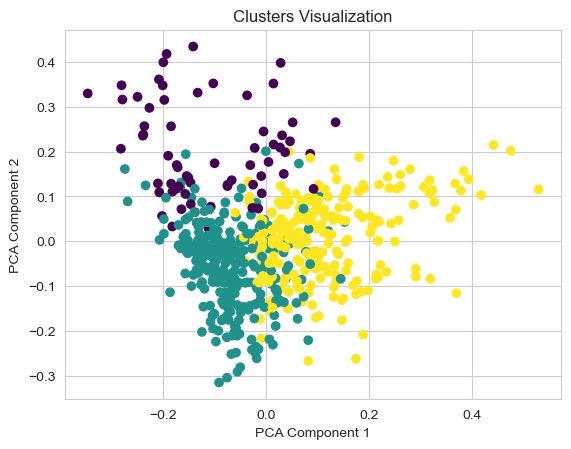

/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


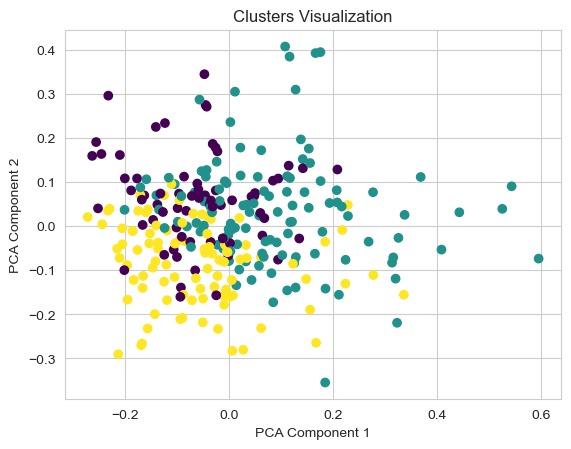

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
import json


# Load the reviews JSON file directly from the given path
file_path = '/Users/vinitbhanushali/Desktop/Rutgers-Coursework/Capstone_Project/fitbit_reviews_new.json'

with open(file_path, 'r', encoding='utf-8') as f:
    fitbit_reviews = json.load(f)

# Now you can work with the 'fitbit_reviews' variable


# Convert JSON to DataFrame
df = pd.DataFrame(fitbit_reviews)

# Segregate comments by sentiment
positive_comments = df[df['Sentiment'] == 'Positive']['Comment'].tolist()
negative_comments = df[df['Sentiment'] == 'Negative']['Comment'].tolist()

# Function to extract top keywords for a cluster
def extract_keywords(texts, vectorizer, top_n=5):
    # Transform texts using the vectorizer
    X = vectorizer.transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    # Sum TF-IDF scores for each word
    tfidf_scores = X.sum(axis=0).A1
    keywords = [(feature_names[i], tfidf_scores[i]) for i in range(len(feature_names))]
    # Sort by score and return top keywords
    sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
    return [keyword for keyword, score in sorted_keywords[:top_n]]

# Function to preprocess, cluster, and name comments
def cluster_and_name_comments(comments, num_clusters=3, visualize=True):
    # Vectorize comments using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
    X = vectorizer.fit_transform(comments)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Visualize clusters using PCA
    if visualize:
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(X.toarray())
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
        plt.title('Clusters Visualization')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()

    # Group comments by cluster
    clustered_comments = {i: [] for i in range(num_clusters)}
    for comment, label in zip(comments, labels):
        clustered_comments[label].append(comment)

    # Assign descriptive names to clusters
    named_clusters = {}
    for cluster_id, cluster_comments in clustered_comments.items():
        # Extract keywords for each cluster
        keywords = extract_keywords(cluster_comments, vectorizer)
        cluster_name = " ".join(keywords)  # Create a name from the top keywords
        named_clusters[cluster_name] = cluster_comments

    return named_clusters

# Cluster positive comments and name clusters
positive_clusters_named = cluster_and_name_comments(positive_comments, num_clusters=3)

# Cluster negative comments and name clusters
negative_clusters_named = cluster_and_name_comments(negative_comments, num_clusters=3)

# Save clusters with descriptive names to JSON files
with open('positive_clusters_named.json', 'w', encoding='utf-8') as f:
    json.dump(positive_clusters_named, f, ensure_ascii=False, indent=4)

with open('negative_clusters_named.json', 'w', encoding='utf-8') as f:
    json.dump(negative_clusters_named, f, ensure_ascii=False, indent=4)


/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


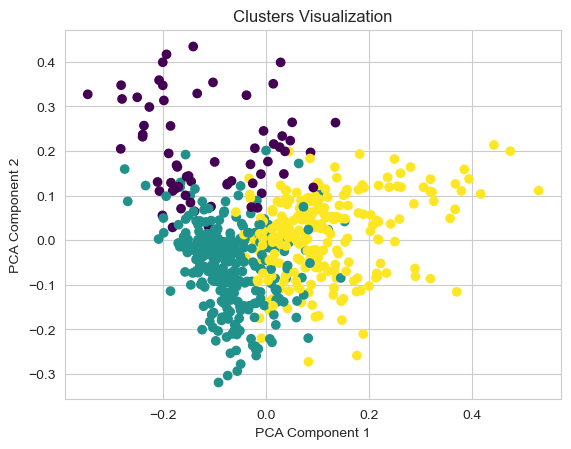

/Users/vinitbhanushali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


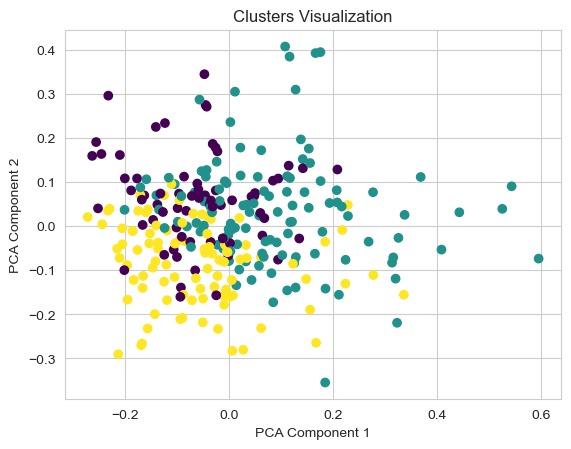

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import json
import matplotlib.pyplot as plt


# Load the reviews JSON file directly from the given path
file_path = '/Users/vinitbhanushali/Desktop/Rutgers-Coursework/Capstone_Project/fitbit_reviews_new.json'

with open(file_path, 'r', encoding='utf-8') as f:
    fitbit_reviews = json.load(f)

# Convert JSON to DataFrame
df = pd.DataFrame(fitbit_reviews)

# Segregate comments by sentiment
positive_comments = df[df['Sentiment'] == 'Positive']['Comment'].tolist()
negative_comments = df[df['Sentiment'] == 'Negative']['Comment'].tolist()

# Function to extract top keywords for a cluster
def extract_keywords(texts, vectorizer, top_n=5):
    # Transform texts using the vectorizer
    X = vectorizer.transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    # Sum TF-IDF scores for each word
    tfidf_scores = X.sum(axis=0).A1
    keywords = [(feature_names[i], tfidf_scores[i]) for i in range(len(feature_names))]
    # Sort by score and return top keywords
    sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
    return [keyword for keyword, score in sorted_keywords[:top_n]]

# Function to preprocess, cluster, and name comments
def cluster_and_name_comments(comments, vectorizer, num_clusters=3, visualize=True):
    # Vectorize comments using TF-IDF
    X = vectorizer.fit_transform(comments)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Visualize clusters using PCA
    if visualize:
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(X.toarray())
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
        plt.title('Clusters Visualization')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()

    # Group comments by cluster
    clustered_comments = {i: [] for i in range(num_clusters)}
    for comment, label in zip(comments, labels):
        clustered_comments[label].append(comment)

    # Extract keywords and name the clusters
    named_clusters = {}
    for cluster_id, cluster_comments in clustered_comments.items():
        keywords = extract_keywords(cluster_comments, vectorizer)
        cluster_name = ", ".join(keywords)  # Create a name from the top keywords
        named_clusters[cluster_name] = cluster_comments

    return named_clusters

# Vectorizer for TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)

# Cluster positive comments and name clusters
positive_clusters_named = cluster_and_name_comments(positive_comments, vectorizer, num_clusters=3)

# Cluster negative comments and name clusters
negative_clusters_named = cluster_and_name_comments(negative_comments, vectorizer, num_clusters=3)

# Ensure no overlap in words between positive and negative clusters
positive_keywords = set()
negative_keywords = set()

# Collect all keywords from both positive and negative clusters
for cluster_name in positive_clusters_named:
    positive_keywords.update(cluster_name.split(", "))
for cluster_name in negative_clusters_named:
    negative_keywords.update(cluster_name.split(", "))

# Remove common words
common_keywords = positive_keywords.intersection(negative_keywords)
for cluster_name in positive_clusters_named.copy():
    keywords = set(cluster_name.split(", "))
    if keywords & common_keywords:
        unique_keywords = keywords - common_keywords
        if unique_keywords:
            new_name = ", ".join(unique_keywords)
            positive_clusters_named[new_name] = positive_clusters_named.pop(cluster_name)

for cluster_name in negative_clusters_named.copy():
    keywords = set(cluster_name.split(", "))
    if keywords & common_keywords:
        unique_keywords = keywords - common_keywords
        if unique_keywords:
            new_name = ", ".join(unique_keywords)
            negative_clusters_named[new_name] = negative_clusters_named.pop(cluster_name)

# Save clusters with descriptive names to JSON files
with open('positive_clusters_named.json', 'w', encoding='utf-8') as f:
    json.dump(positive_clusters_named, f, ensure_ascii=False, indent=4)

with open('negative_clusters_named.json', 'w', encoding='utf-8') as f:
    json.dump(negative_clusters_named, f, ensure_ascii=False, indent=4)


In [37]:
# Display positive cluster names
print("Positive Cluster Names:")
for cluster_name in positive_clusters_named.keys():
    print(f"- {cluster_name}")

# Display negative cluster names
print("\nNegative Cluster Names:")
for cluster_name in negative_clusters_named.keys():
    print(f"- {cluster_name}")


Positive Cluster Names:
- sleep, score, time, data
- charge, use
- label

Negative Cluster Names:
- rate
- updated
- watch, sense


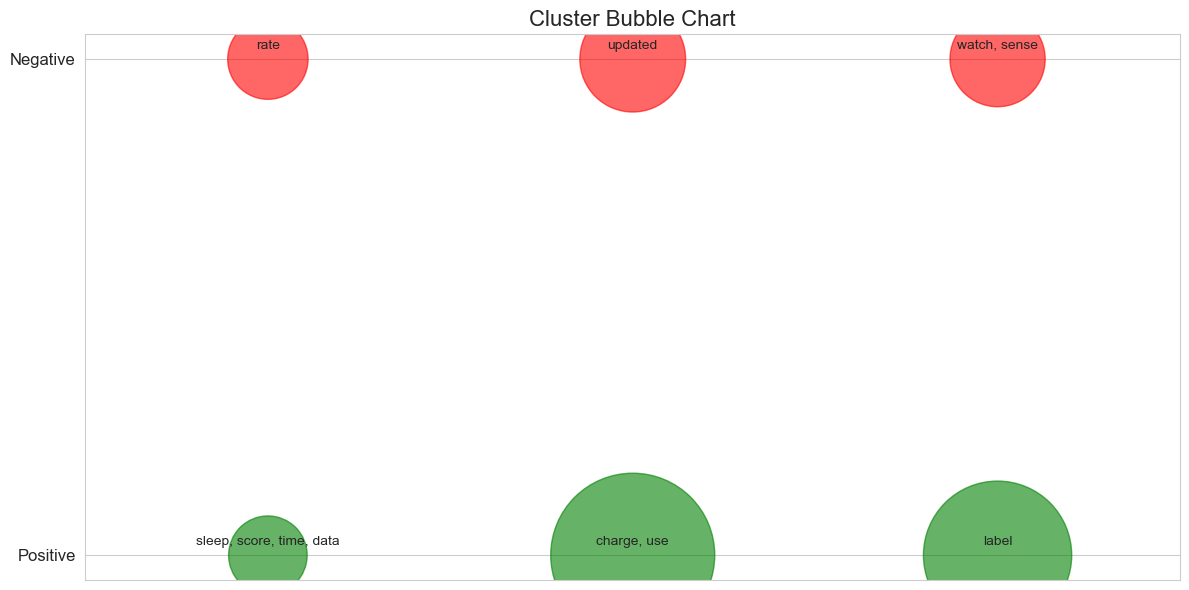

In [38]:
import matplotlib.pyplot as plt

# Function to prepare data for bubble chart
def prepare_bubble_chart_data(clusters_named):
    cluster_sizes = {name: len(comments) for name, comments in clusters_named.items()}
    return cluster_sizes

# Prepare data for positive and negative clusters
positive_cluster_sizes = prepare_bubble_chart_data(positive_clusters_named)
negative_cluster_sizes = prepare_bubble_chart_data(negative_clusters_named)

# Bubble chart for positive clusters
plt.figure(figsize=(12, 6))

# Plot positive clusters: Spread the bubbles along the x-axis within the positive space
x_positive = range(len(positive_cluster_sizes))
plt.scatter(x_positive, 
            [1] * len(positive_cluster_sizes), 
            s=[size * 50 for size in positive_cluster_sizes.values()],  # Bubble size
            alpha=0.6, label='Positive Clusters', color='green')

# Add labels for positive clusters
for i, (cluster_name, size) in enumerate(positive_cluster_sizes.items()):
    plt.text(i, 1.02, cluster_name, ha='center', fontsize=10)

# Bubble chart for negative clusters: Spread the bubbles along the x-axis within the negative space
x_negative = range(len(negative_cluster_sizes))
plt.scatter(x_negative, 
            [2] * len(negative_cluster_sizes), 
            s=[size * 50 for size in negative_cluster_sizes.values()],  # Bubble size
            alpha=0.6, label='Negative Clusters', color='red')

# Add labels for negative clusters
for i, (cluster_name, size) in enumerate(negative_cluster_sizes.items()):
    plt.text(i, 2.02, cluster_name, ha='center', fontsize=10)

    # General chart settings
plt.title('Cluster Bubble Chart', fontsize=16)
plt.yticks([1, 2], ['Positive', 'Negative'], fontsize=12)
plt.xticks([])  # Hide x-ticks

# Adjust x-limits to make sure all bubbles fit inside the rectangle
plt.xlim(-0.5, max(len(positive_cluster_sizes), len(negative_cluster_sizes)) - 0.5)
# Display the chart
plt.tight_layout()
plt.show()
